#### <u> PROJECT  TITLE- 

<b>💼 Predictive model for Employee Attrition Analysis and Retention Strategies || Why Workers Quit?</b>


Challenges that an organization has to face due employee attrition are:

- Expensive in terms of both money and time to train new employees.
- Loss of experienced employees
- Impact in productivity
- Impact profit

#### Before getting in to the Analysis Let's frame some questions so that we hv clarity about The solution that is being developed will make sense.

<b> Business questions</b>
- Q1 -> What factors are contributing more to employee attrition?
- Q2 -> What type of measures should the company take in order to retain their employees?
- Q3 -> What business value does the model bring?


####  -> Module set-up & Importing necessary libraries

In [1]:
!pip install -q hvplot
import warnings
warnings.filterwarnings('ignore')
import hvplot   # for beautiful & interactive charts
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns  # For advanced and attractive visualizations
import hvplot.pandas  # To allow pandas DataFrames to use hvplot directly
from sklearn.model_selection import train_test_split # for data validation
from sklearn.ensemble import RandomForestClassifier  # ML algo 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score # for model performance

%matplotlib inline        
sns.set_style("whitegrid")     #Makes your plots have a clean white background with grid lines.
plt.style.use("fivethirtyeight") #Applies a popular visual style (inspired by the FiveThirtyEight website).



pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)  #Allows you to see up to 80 columns and 80 rows of a DataFrame when printing.




[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### -> Loading Dataset

In [2]:
# Load the dataset
df = pd.read_csv('project2.csv')
df.head(5).T


0                       1  \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EmployeeCount                           1                       1   
EmployeeNumber                          1                       2   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                          3                       2   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       2   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
Over18                                  Y                       Y   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating                       3                       4   
RelationshipSatisfaction                1                       4   
StandardHours                          80                      80   
StockOptionLevel                        0                       1   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                         1                       3   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                               2                       3  \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EmployeeCount                                  1                       1   
EmployeeNumber                                 4                       5   
EnvironmentSatisfaction                        4                       4   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                                 2                       3   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                                3                       3   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                        

# -> Exploratory Data Analysis

- <b>Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.</b>
- Univariate analysis
<ol> - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread</ol>
<ol> - Categorical variable : Bar chart showing frequency in each category</ol>

- Bivariate analysis
<ol> - Continous & Continous : Scatter plots to know how continous variables interact with each other</ol>
<ol> - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
categorical variables</ol>
<ol> - Categorical & Continous : Boxplots, Swamplots or even bar charts
Detect outliers</ol>

- Detect outliers
- Feature engineering

 #### <u>-> Displaying basic information about the dataframe.

In [3]:

print("Initial Data Information:")
print(df.info())


Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

<b> <u>Initial Inspections:</b> We came to know,The dataset contains 1470 entries and 35 columns.
<ol><b>-></b> The missing values counts and data types:</ol>

- 35 Columns out of which 26 are numeric & 9 are categorical
- There are no missing values in the Dataset.
- We can see that the dataset is already well structured.
- So let's move further in the analysis.


# -> 1. Descriptive Analysis

#### -> Calculated descriptive statistics for numerical columns.

In [4]:
print("\n Here are some general statistics of numerical columns:")

df.describe().T 


 Here are some general statistics of numerical columns:


count     mean     std     min     25%      50%  \
Age                      1470.00    36.92    9.14   18.00   30.00    36.00   
DailyRate                1470.00   802.49  403.51  102.00  465.00   802.00   
DistanceFromHome         1470.00     9.19    8.11    1.00    2.00     7.00   
Education                1470.00     2.91    1.02    1.00    2.00     3.00   
EmployeeCount            1470.00     1.00    0.00    1.00    1.00     1.00   
EmployeeNumber           1470.00  1024.87  602.02    1.00  491.25  1020.50   
EnvironmentSatisfaction  1470.00     2.72    1.09    1.00    2.00     3.00   
HourlyRate               1470.00    65.89   20.33   30.00   48.00    66.00   
JobInvolvement           1470.00     2.73    0.71    1.00    2.00     3.00   
JobLevel                 1470.00     2.06    1.11    1.00    1.00     2.00   
JobSatisfaction          1470.00     2.73    1.10    1.00    2.00     3.00   
MonthlyIncome            1470.00  6502.93 4707.96 1009.00 2911.00  4919.00   
MonthlyRate              1470.00 14313.10 7117.79 2094.00 8047.00 14235.50   
NumCompaniesWorked       1470.00     2.69    2.50    0.00    1.00     2.00   
PercentSalaryHike        1470.00    15.21    3.66   11.00   12.00    14.00   
PerformanceRating        1470.00     3.15    0.36    3.00    3.00     3.00   
RelationshipSatisfaction 1470.00     2.71    1.08    1.00    2.00     3.00   
StandardHours            1470.00    80.00    0.00   80.00   80.00    80.00   
StockOptionLevel         1470.00     0.79    0.85    0.00    0.00     1.00   
TotalWorkingYears        1470.00    11.28    7.78    0.00    6.00    10.00   
TrainingTimesLastYear    1470.00     2.80    1.29    0.00    2.00     3.00   
WorkLifeBalance          1470.00     2.76    0.71    1.00    2.00     3.00   
YearsAtCompany           1470.00     7.01    6.13    0.00    3.00     5.00   
YearsInCurrentRole       1470.00     4.23    3.62    0.00    2.00     3.00   
YearsSinceLastPromotion  1470.00     2.19    3.22    0.00    0.00     1.00   
YearsWithCurrManager     1470.00     4.12    3.57    0.00    2.00     3.00   

                              75%      max  
Age                         43.00    60.00  
DailyRate                 1157.00  1499.00  
DistanceFromHome            14.00    29.00  
Education                    4.00     5.00  
EmployeeCount                1.00     1.00  
EmployeeNumber            1555.75  2068.00  
EnvironmentSatisfaction      4.00     4.00  
HourlyRate                  83.75   100.00  
JobInvolvement               3.00     4.00  
JobLevel                     3.00     5.00  
JobSatisfaction              4.00     4.00  
MonthlyIncome             8379.00 19999.00  
MonthlyRate              20461.50 26999.00  
NumCompaniesWorked           4.00     9.00  
PercentSalaryHike           18.00    25.00  
PerformanceRating            3.00     4.00  
RelationshipSatisfaction     4.00     4.00  
StandardHours               80.00    80.00  
StockOptionLevel             1.00     3.00  
TotalWorkingYears           15.00    40.00  
TrainingTimesLastYear        3.00     6.00  
WorkLifeBalance              3.00     4.00  
YearsAtCompany               9.00    40.00  
YearsInCurrentRole           7.00    18.00  
YearsSinceLastPromotion      3.00    15.00  
YearsWithCurrManager         7.00    17.00

- <b>Age -> </b> The workforce has a broad age range, from 18 to 60, with an average age of approximately 37 years.
- <b>HourlyRate -> </b> The Max HourlyRate is 100 and The Min HourlyRate is 30 with the mean of 65.89.
- <b>MonthlyIncome -> </b>The Max MonthlyIncome is 19999.00 and The Min MonthlyIncome is 1009.00  with the mean of $6502.93
- <b>TotalWorkingYears -> </b>  The Max TotalWorkingYears is 40, This implise that there are people who have been working in the organization for 40 years

In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("====================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. These features aren't useful for us, So we are going to drop those columns.

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

#### -> So, is the attrrition rate seriously high?

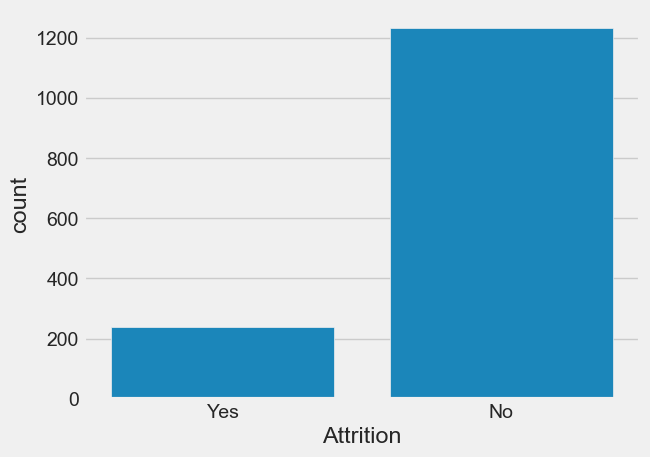

In [7]:
sns.countplot(x='Attrition', data = df)
plt.show()


Yes, the attrition rates are oddly a bit high, and we will investigate this.

#### -> Let's count the unique & total values of each categorical columns

In [8]:
#Get value counts for categorical columns
cat_cols = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        cat_cols.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
cat_cols.remove('Attrition')
   

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

<b>Attrition Rate-> </b>  Out of 1470 employees, 237 (approximately 16.1%) have attrited, while 1233 (83.9%) have not.

#### -> Label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

#### ->  Numerical Features

In [10]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("=================================================================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [11]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("========================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


  #### -> Data Visualisation

#### -> Histogram  for Distribution of attrition
- A histogram is a type of bar chart that shows the distribution of numerical data —
- how often different values or ranges (called bins) appear in your dataset.
- Used when you want to see frequency or groupings of values



<Axes: xlabel='DistanceFromHome', ylabel='Count'>

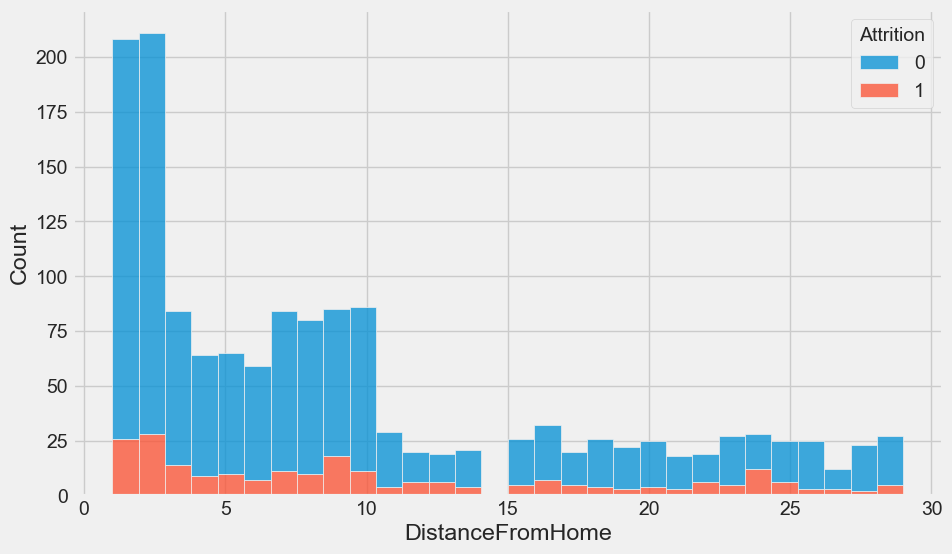

In [12]:
#Do employees who live far from work tend to leave more?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', bins=30, kde=False, multiple='stack')

#df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

<Axes: xlabel='Education', ylabel='Count'>

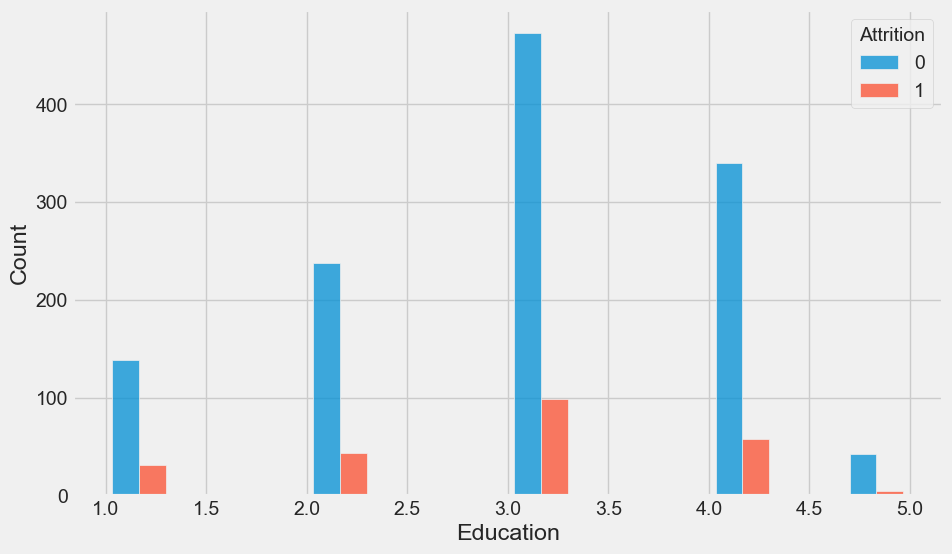

In [13]:
# lets check if employees with certain education levels are more likely to leave.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Education', hue='Attrition', multiple='dodge', shrink=0.8)

#df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

- Those who are holding bachelors degree are more likely to leave.

<Axes: xlabel='RelationshipSatisfaction', ylabel='Count'>

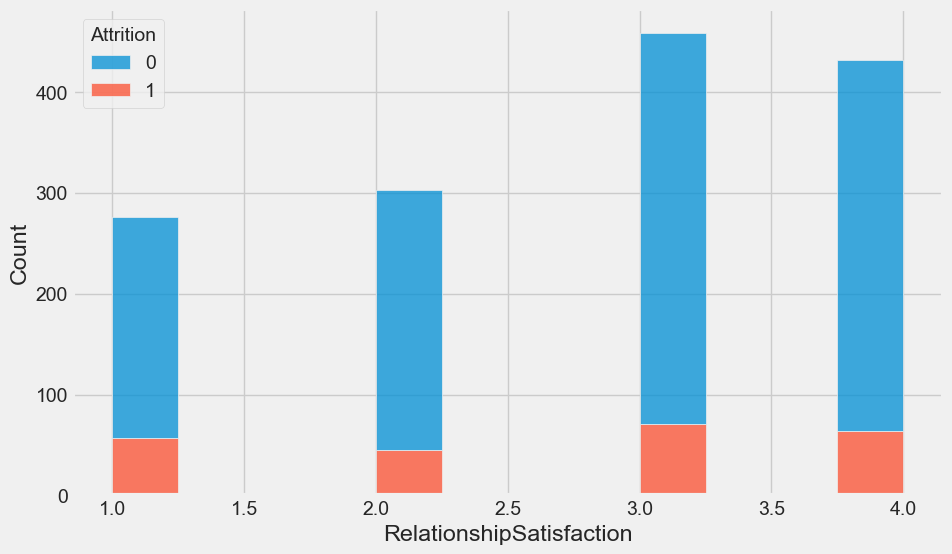

In [14]:
#Are people with low relationship satisfaction more likely to leave?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='RelationshipSatisfaction', hue='Attrition', multiple='stack')
#df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

<Axes: xlabel='JobInvolvement', ylabel='Count'>

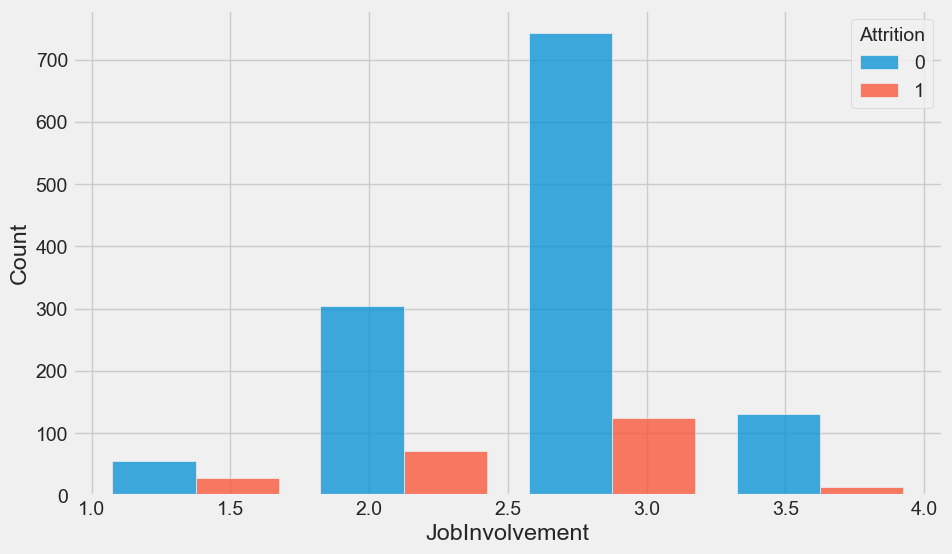

In [15]:
# Do highly involved employees mostly stay?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JobInvolvement', hue='Attrition', multiple='dodge', shrink=0.8, bins=df['JobInvolvement'].nunique())

#df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

<Axes: xlabel='JobLevel', ylabel='Count'>

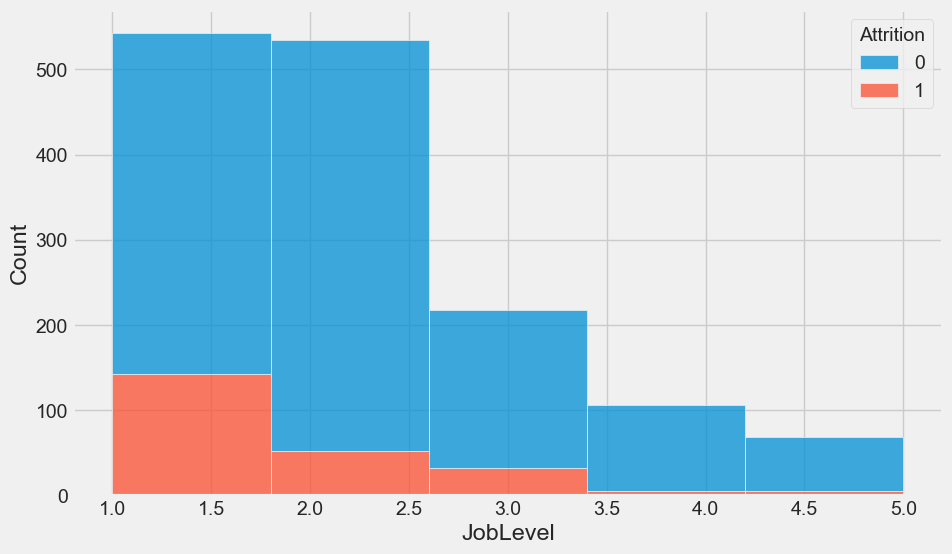

In [16]:
#Are lower-job level employees more likely to leave?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JobLevel', hue='Attrition', multiple='stack', bins=df['JobLevel'].nunique())

#df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

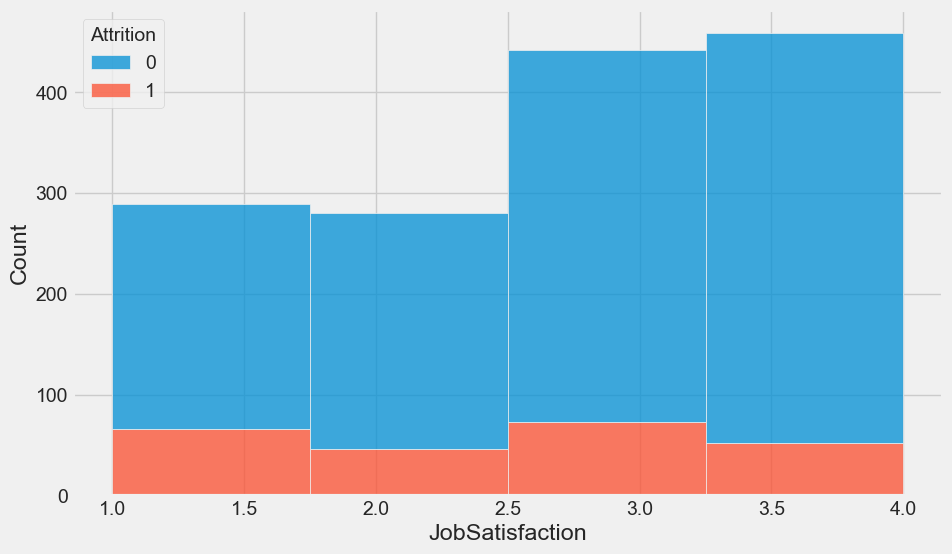

In [17]:
#Are unhappy employees (low job satisfaction) more likely to leave?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JobSatisfaction', hue='Attrition', multiple='stack', bins=df['JobSatisfaction'].nunique())

#df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

<Axes: xlabel='NumCompaniesWorked', ylabel='Count'>

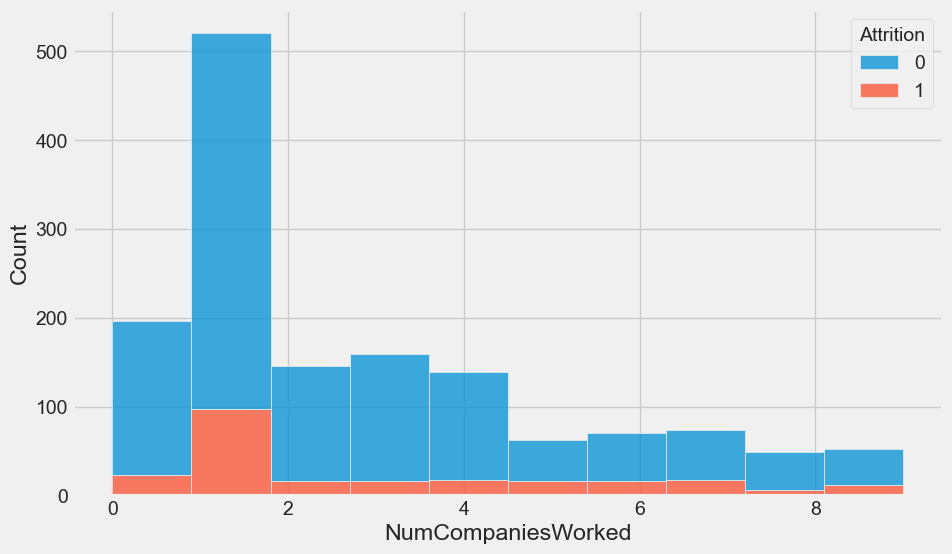

In [18]:
#df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NumCompaniesWorked', hue='Attrition', multiple='stack', bins=df['NumCompaniesWorked'].nunique())


<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

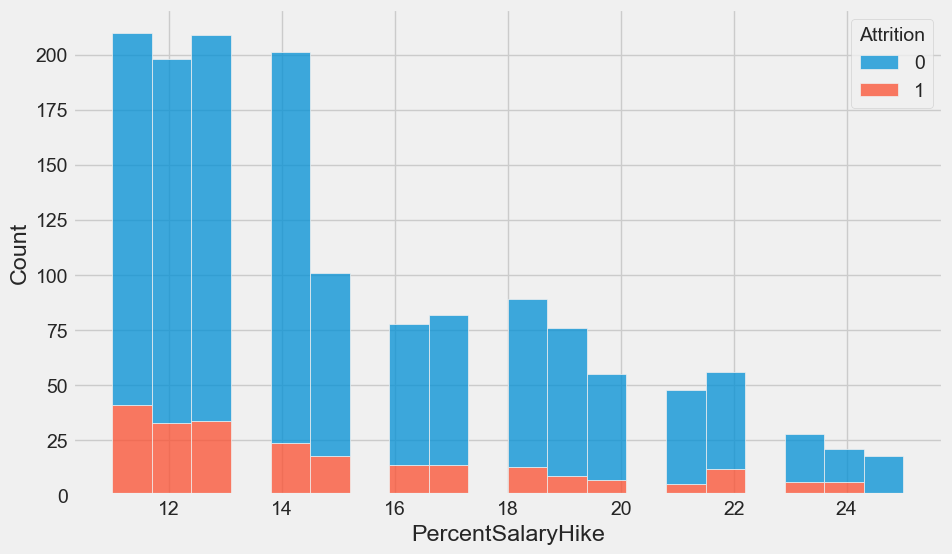

In [19]:
#Are the less percentgeSalaryhike employees has more attrition rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PercentSalaryHike', hue='Attrition', multiple='stack', bins=20)

#df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

<Axes: xlabel='StockOptionLevel', ylabel='Count'>

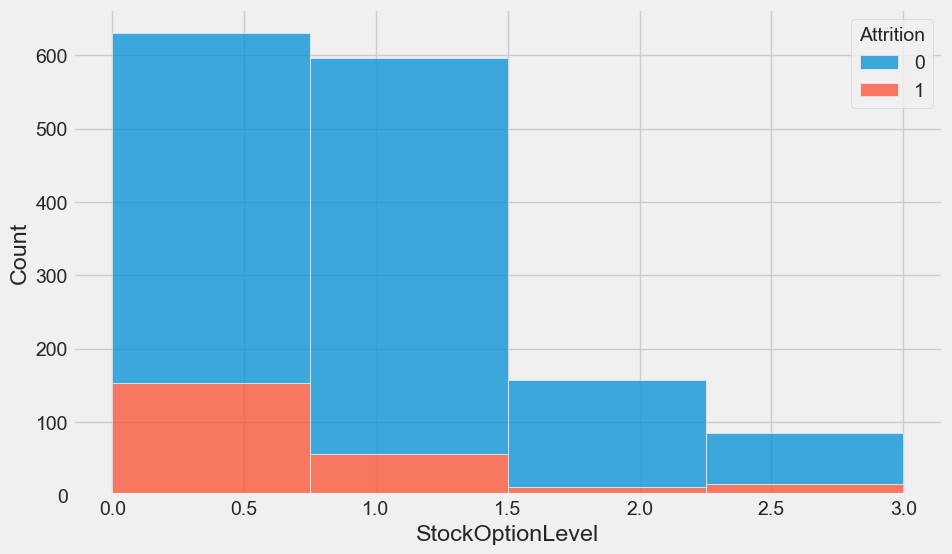

In [20]:
# Are people with 0 StockOptionlevel has more attrition rate?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='StockOptionLevel', hue='Attrition', multiple='stack', bins=df['StockOptionLevel'].nunique())
#df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

Yes, people with 0 StockOptionlevel Attrited more.


It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees.

<Axes: xlabel='Age', ylabel='Count'>

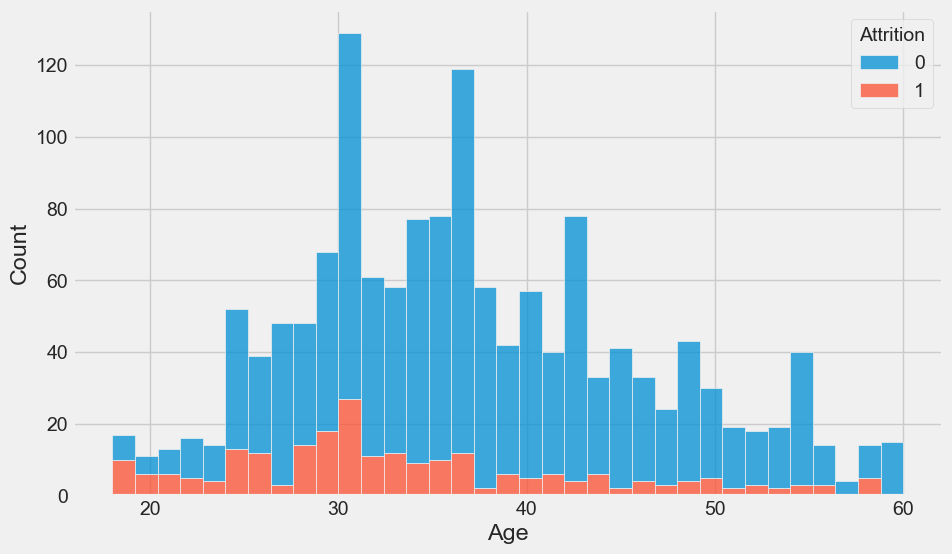

In [21]:
#What age group has the highest attrition?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=35)
#df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

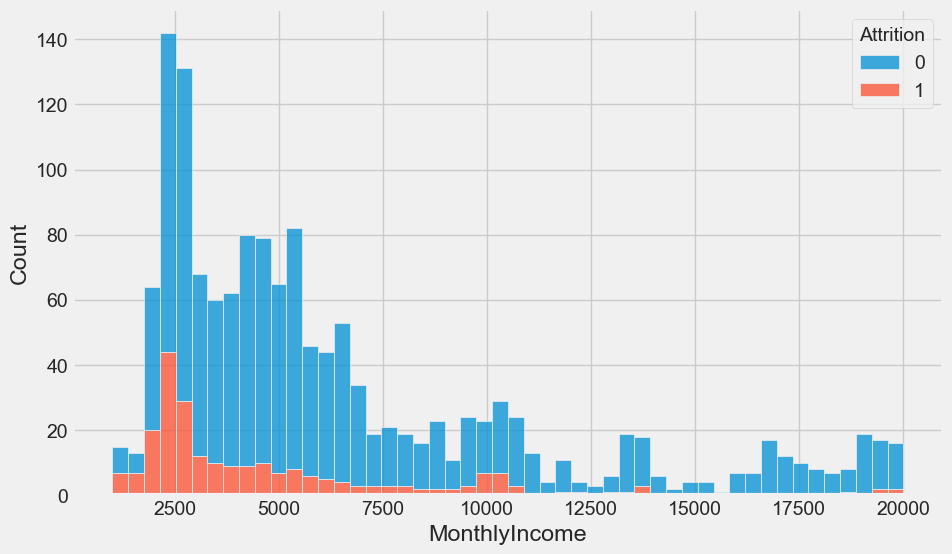

In [22]:
#Are employees with Higher salaries tend to stay?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=50)

#df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)


<Axes: xlabel='YearsAtCompany', ylabel='Count'>

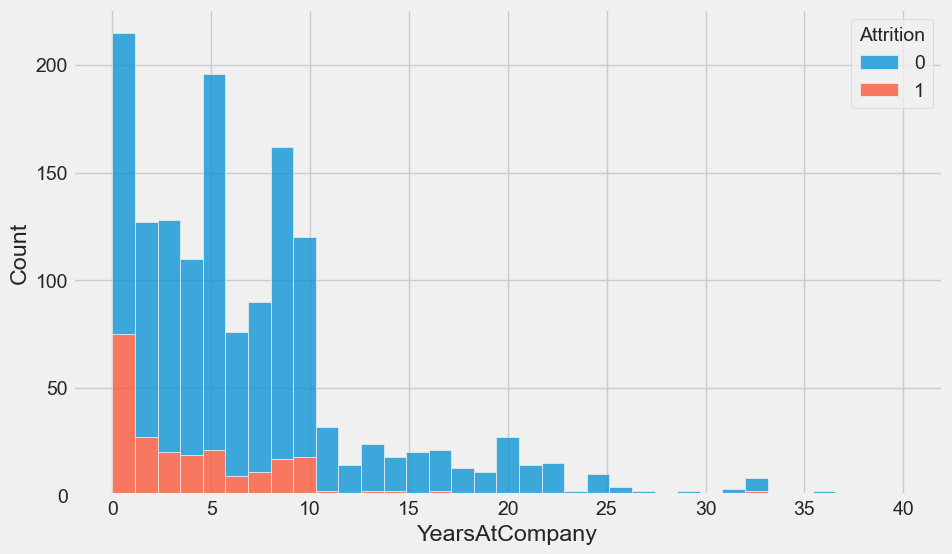

In [23]:
#Are long-term employees more likely to stay?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=35)
#df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

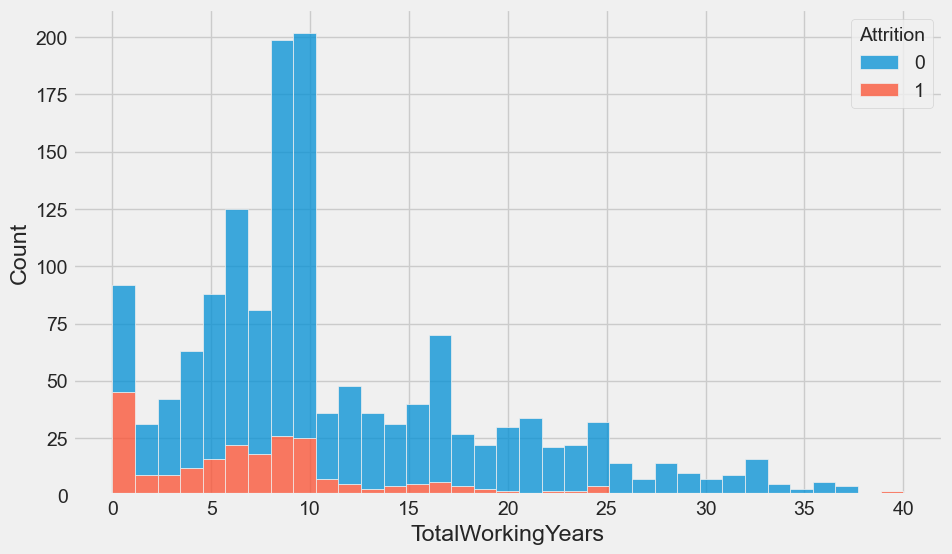

In [24]:
#Do employees with long careers tend to stay?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', bins=35)
#df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35) 

#### -> Findings
- The workers with low **JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears** are more likely to quit their jobs.
 
- <b>BusinessTravel:</b> The workers who travel a lot are more likely to quit than other employees.

- <b>Department:</b> The workers in Research & Development are more likely to stay than the workers in other departments.

- <b>EducationField:</b> The workers with Human Resources and Technical Degree are more likely to quit than employees from other fields of education.

- <b>JobRole:</b> The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.


# -> 2. Diagnostic analysis

#### -> Is there a loss of experienced employees.

Text(0, 0.5, 'Employee Count')

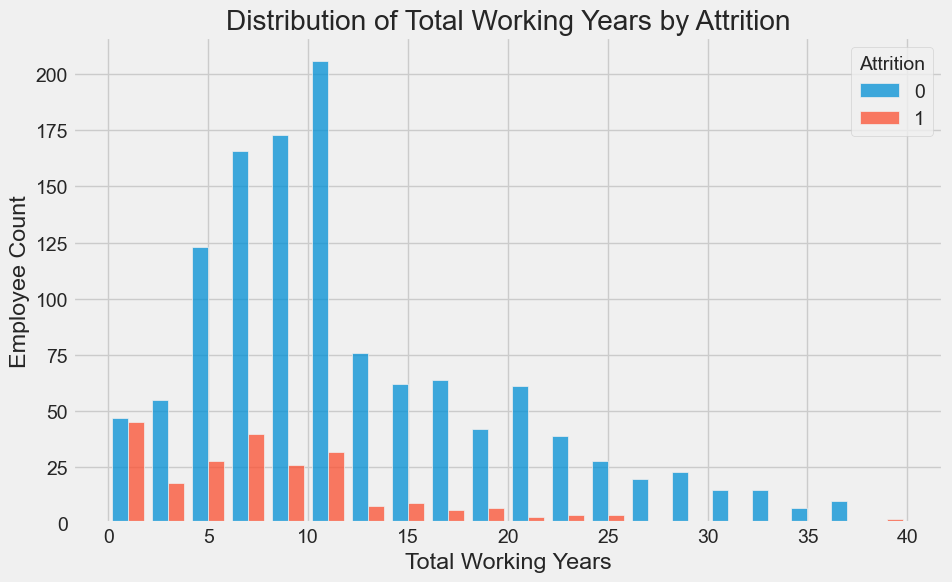

In [25]:
plt.figure(figsize=(10, 6))

# //Create a histogram to visualize the distribution of TotalWorkingYears for each attrition group
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='dodge', bins=20, shrink=0.8)
plt.title('Distribution of Total Working Years by Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Employee Count')


- The chart reveals that employees with fewer years of total work experience, particularly those with 0-10 years of experience are more likely to leave.
-  Employees with more working years (15+ years) have a significantly lower rate of attrition.

#### -> Lets check how Maritalstautus is related to Attrition.

Text(0, 0.5, 'Employee Count')

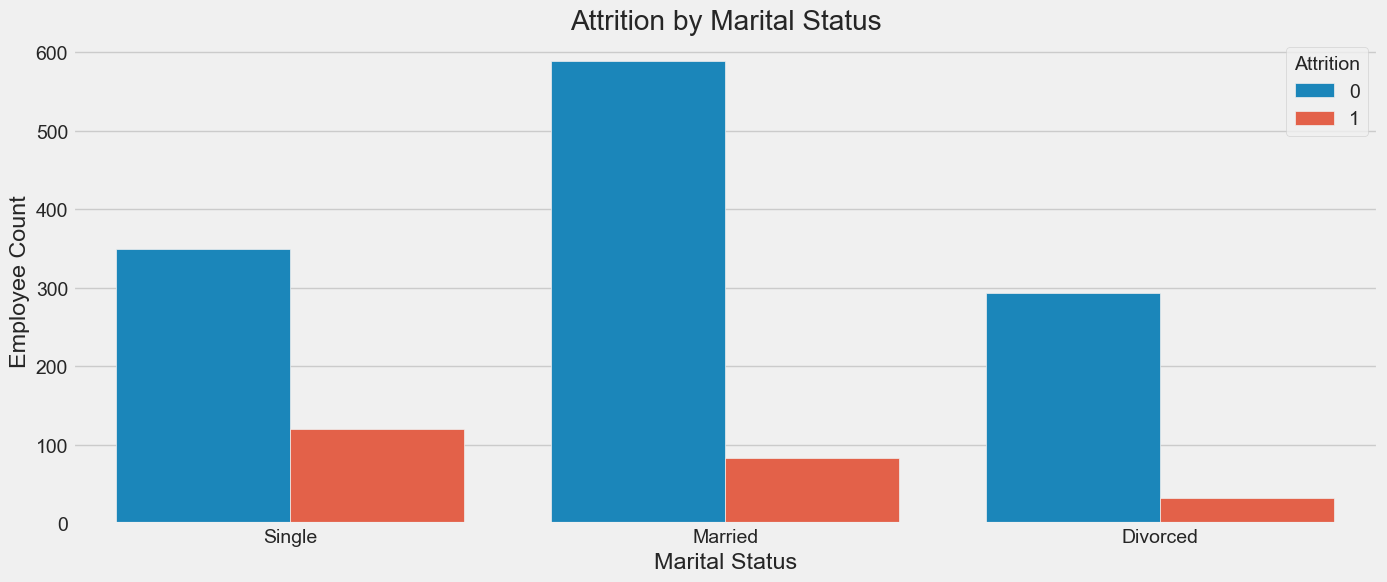

In [26]:
# Create a count plot to visualize the relationship between Attrition and MaritalStatus
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')

# Add title and labels
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Employee Count')


- The workers who have a **Single marital status** are more likely to quit then the Married or Divorced.

#### -> Which Education field has more Attrition Rate

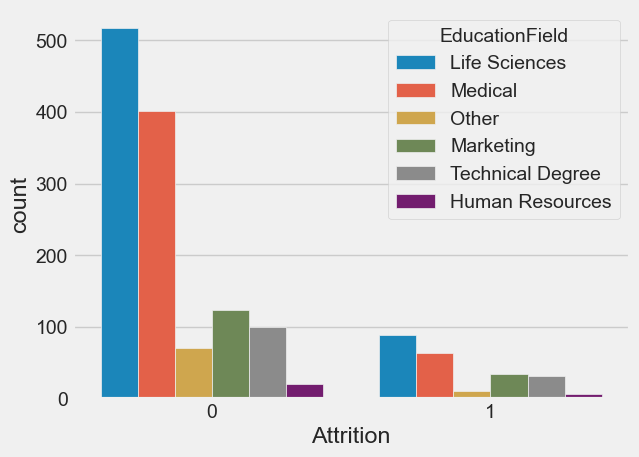

In [27]:
sns.countplot(x='Attrition', hue= 'EducationField', data = df)
plt.show()

- The chart is showing that the highest attrited employees are of LIFE SCIENCE.

#### -> Is Overtime a factor in Employees Attrition

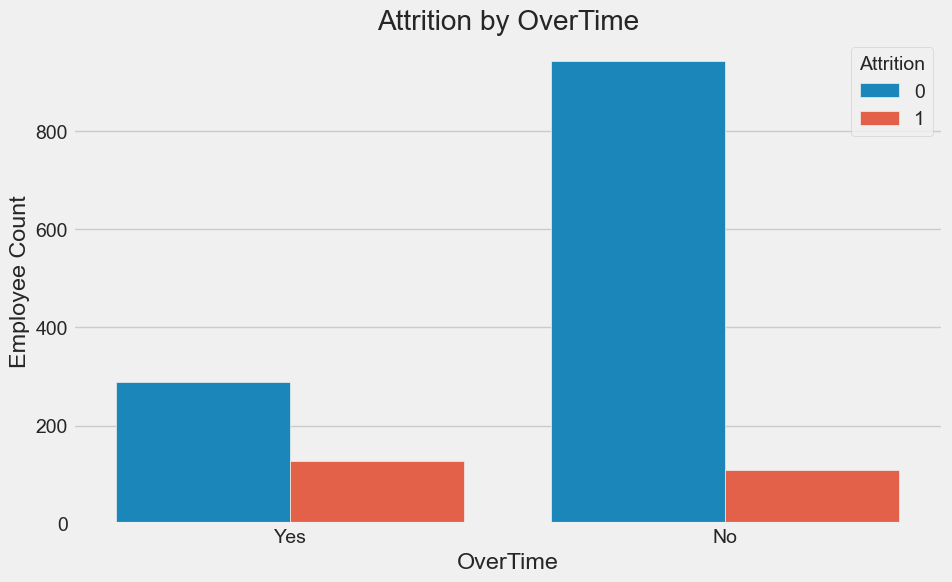

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Employee Count')
plt.show()


- The employees who work more hours are likely to quit than others.

 #### ->  Is there a pattern of attrition related to MonthlyIncome and age?

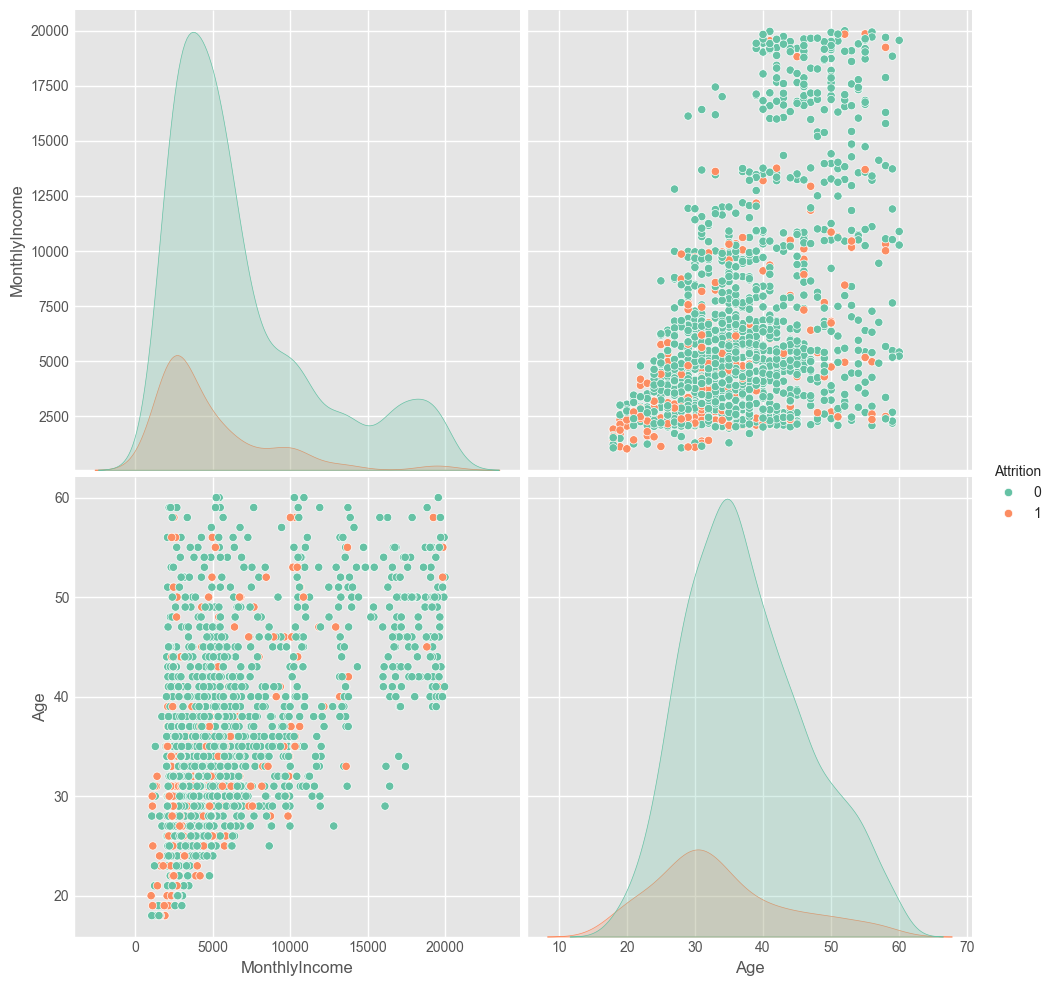

In [29]:
# Employees who might be at a higher risk of attrition. 
plt.style.use('ggplot')
g = sns.pairplot(df, vars=["MonthlyIncome", "Age"],hue="Attrition", palette = 'Set2' ,height=5)

 Yes, Younger employees with less monthly income tend more to attrition as they are not attached to a stable life and have many more opportunities.

#### -> Attrition by department

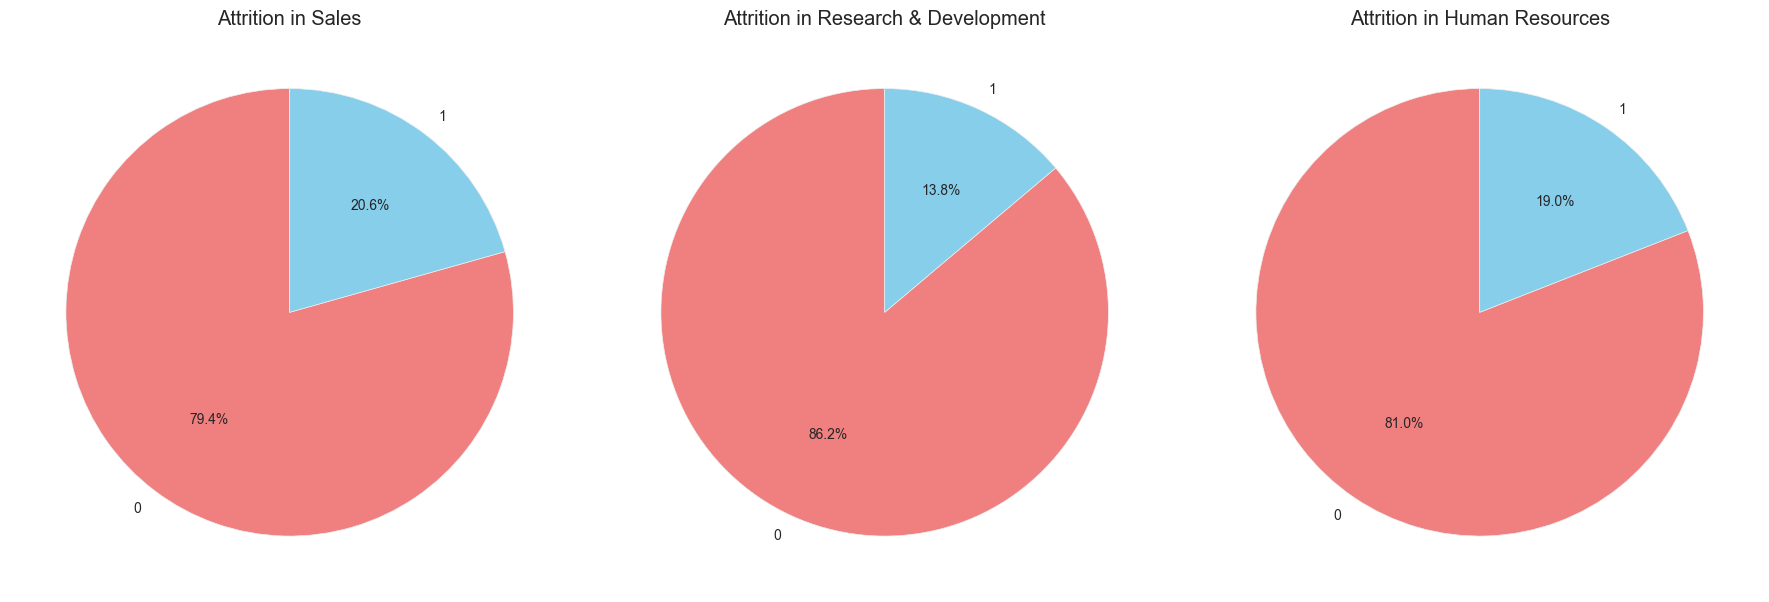

In [30]:
# To Get the unique departments
departments = df['Department'].unique()
fig, axes = plt.subplots(1, len(departments), figsize=(18, 6))

colors = ['lightcoral', 'skyblue']

# Loop through each department to create a pie chart
for i, department in enumerate(departments):
    dept_df = df[df['Department'] == department]
    
    attrition_counts = dept_df['Attrition'].value_counts()
    
    axes[i].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'Attrition in {department}')
plt.tight_layout()

-  Employees in the Research & Development department are the least likely to leave, while those in the Sales department have the highest attrition rate.

#### -> 🔨 (One-hot encoding) Data Preparation for Correlation Matrix 

In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nDataFrame after one-hot encoding categorical columns:")
print(df_encoded.info())



DataFrame after one-hot encoding categorical columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                

# ->📉 Correlation Matrix


--- Generating Correlation Heatmap ---


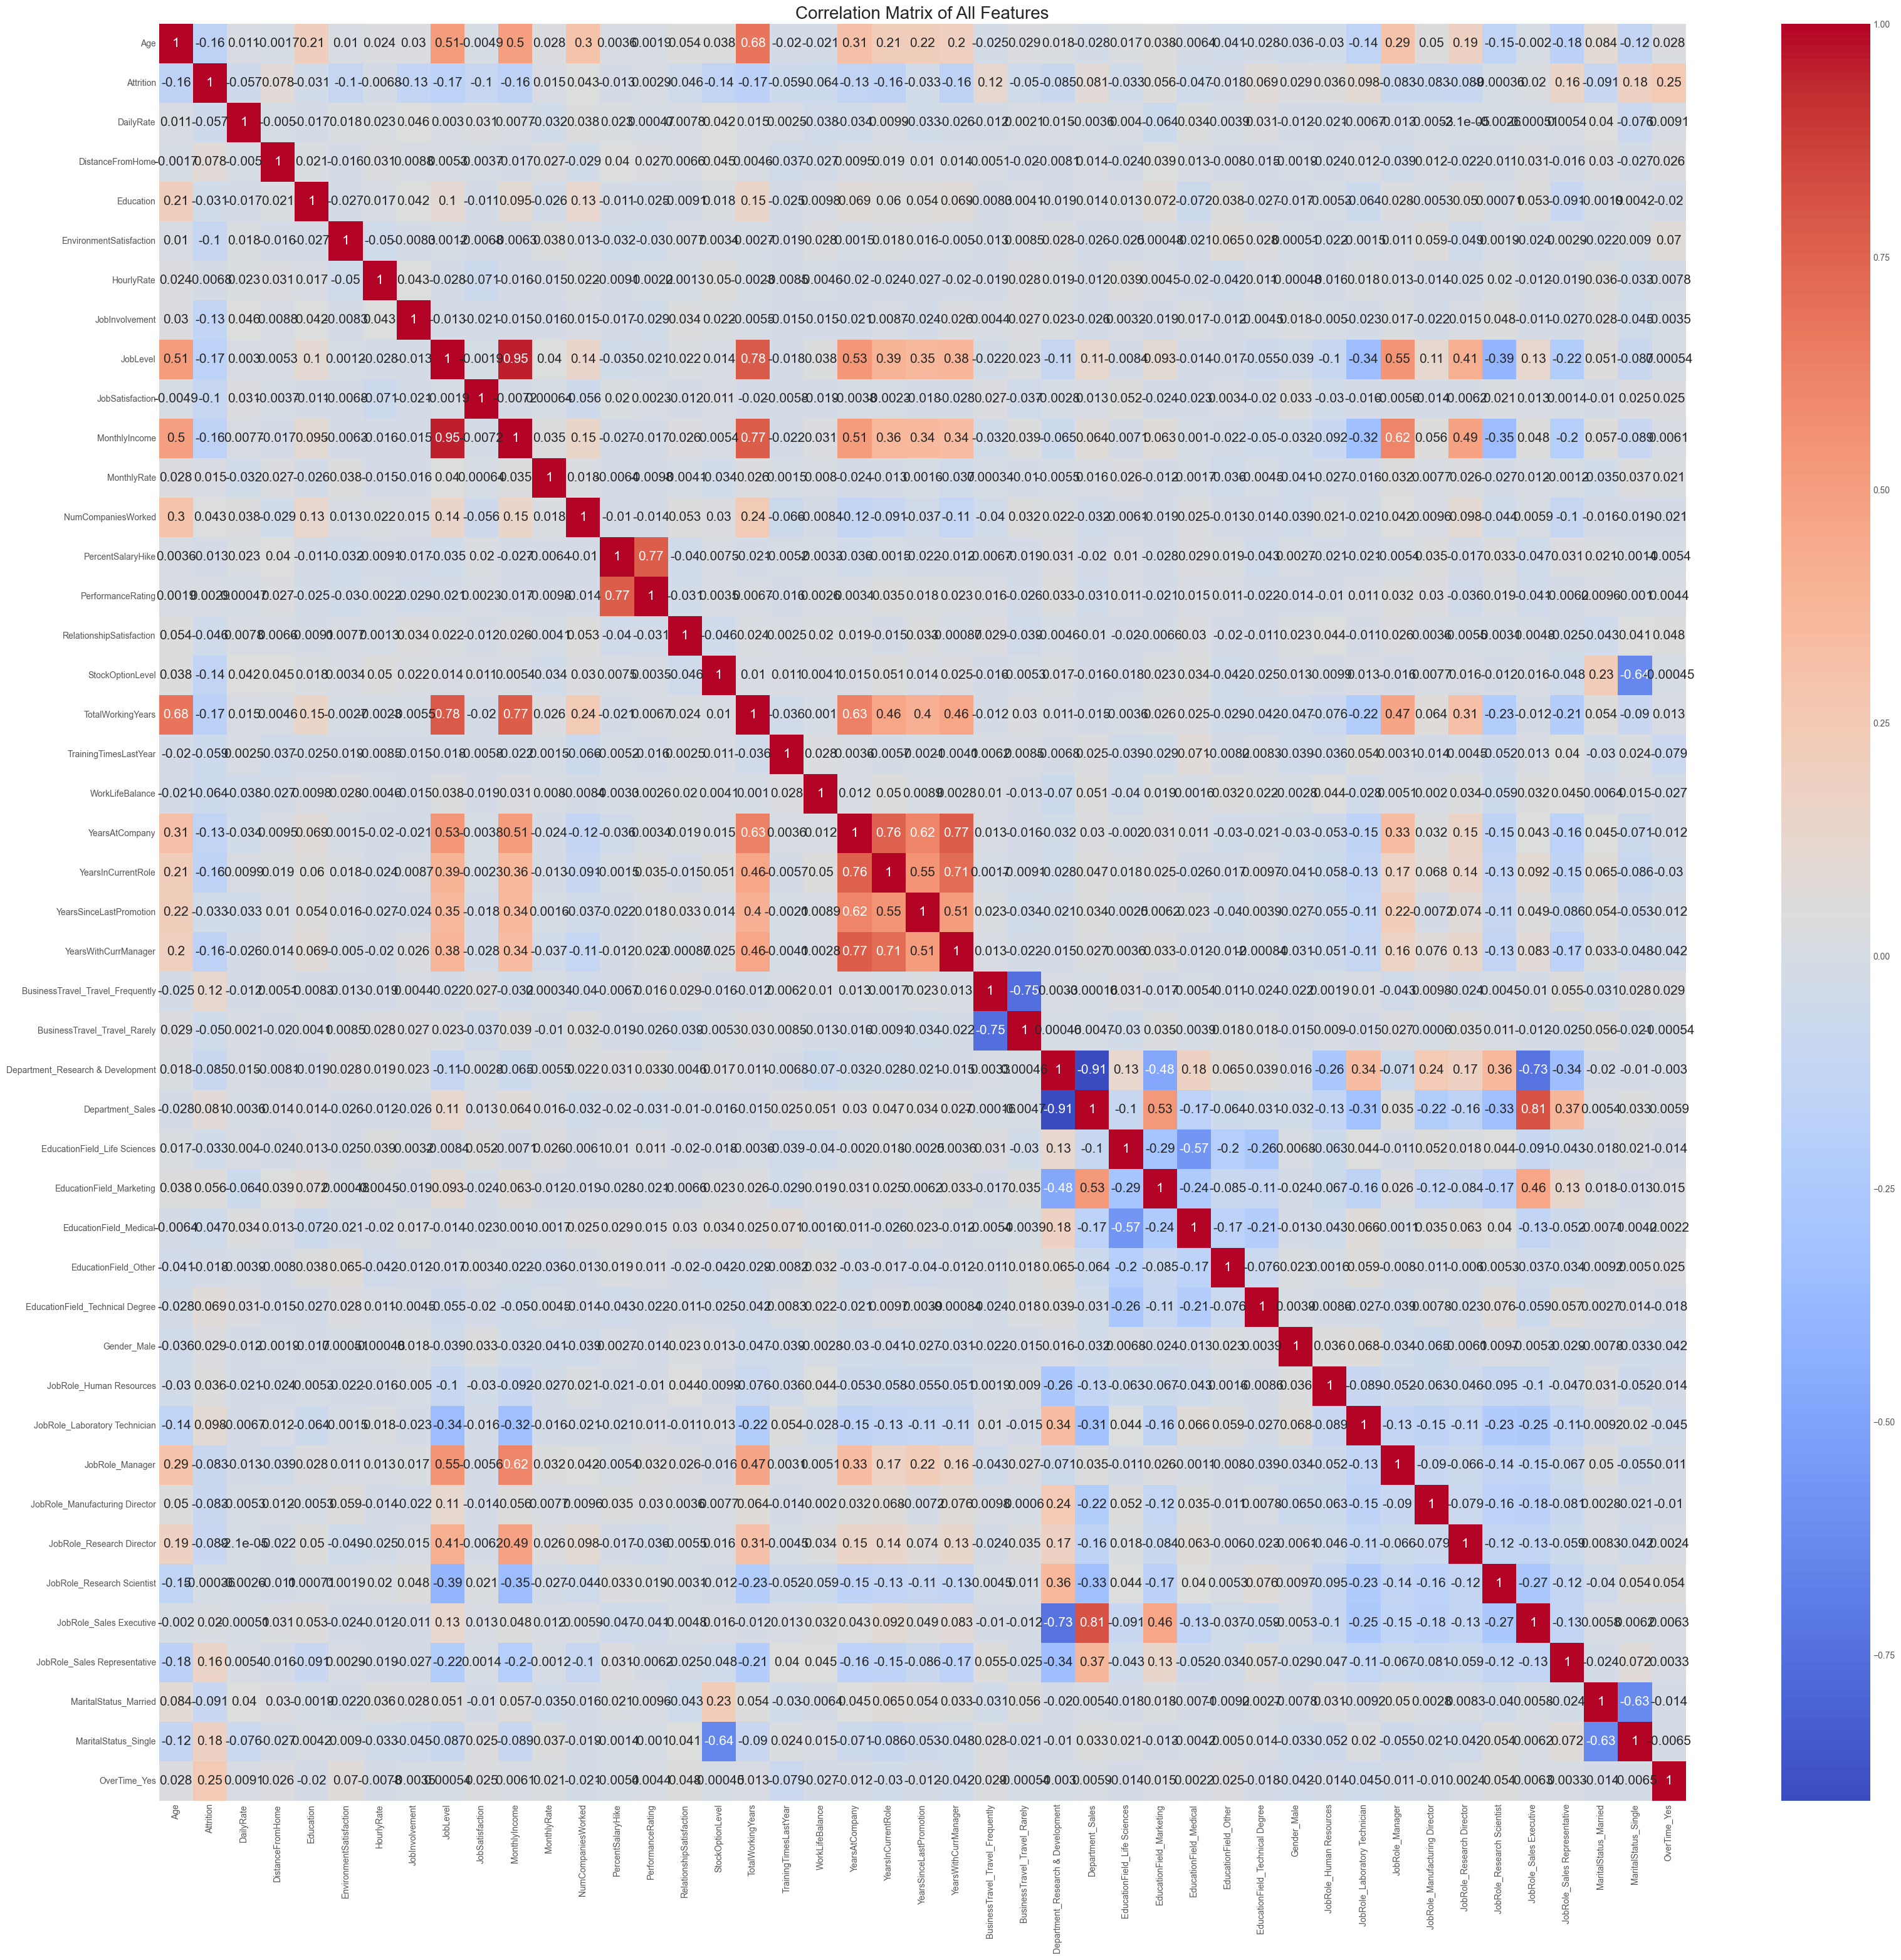

In [32]:
print("\n--- Generating Correlation Heatmap ---")

# Calculate the correlation matrix on the fully numerical DataFrame
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm", annot_kws={"size": 15})
plt.title("Correlation Matrix of All Features", fontsize=20)
plt.show()


#### <u> Observations

<b>1. Correlations with the Target Variable ('Attrition')</b>

- <b>JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction:(-)</b>  means that employees who are less satisfied in their roles, environment, or relationships with colleagues are more likely to leave the company.
- <b> MonthlyIncome, JobLevel, TotalWorkingYears:(-) </b> This suggests that long-term, high-value employees are more stable.
- <b>YearsAtCompany, YearsWithCurrManager:(-)</b> The longer an employee has been with the company or with their current manager, the less likely they are to leave.

- <b>DistanceFromHome:(+)</b>  indicates that employees who live farther from the office are more likely to leave.
- <b>NumCompaniesWorked:(+)</b> Employees who have worked for more companies in the past may have a higher propensity for job hopping.

<b>2. Strong Correlations Among Features (Multicollinearity)</b>

Multicollinearity refers to a situation where two or more independent variables in a model are highly correlated with each other. While this is less of a concern for a tree-based model like Random Forest, it's an important observation to make.
- <b>JobLevel and MonthlyIncome:</b>  It makes sense, as a higher job level is directly associated with a higher monthly salary.

- <b>TotalWorkingYears, JobLevel, and Age:</b>  As an employee's age and total working years increase, their job level and experience typically also increase.

- <b> YearsAtCompany, YearsSinceLastPromotion, and YearsWithCurrManager:</b> These features are also expected to show high positive correlations with each other, as they all measure different aspects of tenure within the company.




# ->Machine Learning Ops

####  3. predictive Analysis

#### -> Feature Selection(I/O selection)

In [33]:
# Separate features (X) and target (y)
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


#### -> Data Division (Training & Testing)

In [34]:
# Split the data into training and testing sets
print("\n--- Training a Machine Learning Model ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")





--- Training a Machine Learning Model ---
Training set size: 1102 samples
Testing set size: 368 samples


#### -> Feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [36]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

 **-> What defines Success?**

- We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%.

In [37]:
y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8396739130434783)

In [38]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.85%
Leaving Rate: 16.15%
===============TEST=================
Staying Rate: 83.97%
Leaving Rate: 16.03%


# -> Random forest

#### -> Model preparation & Fitting

In [39]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
 #Make predictions on the test set
y_pred = model.predict(X_test) 


####  -> Model Evaluation 

In [41]:
accuracy =accuracy_score (y_test,y_pred)
print("accuracy=",accuracy)

print("\n--- Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))



accuracy= 0.8342391304347826

--- Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       309
           1       0.43      0.10      0.16        59

    accuracy                           0.83       368
   macro avg       0.64      0.54      0.54       368
weighted avg       0.78      0.83      0.79       368




Confusion Matrix:


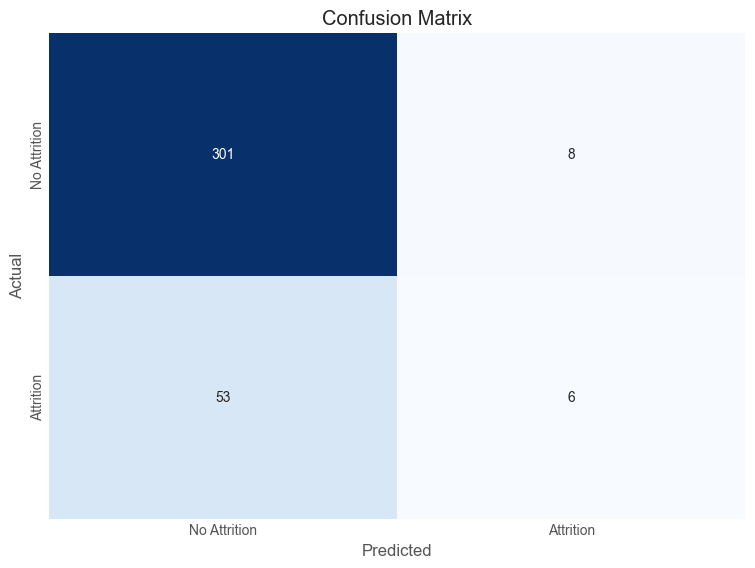

In [42]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### -> Feature Importance

Top 15 most important features:
MonthlyIncome             0.08
Age                       0.06
DailyRate                 0.05
TotalWorkingYears         0.05
DistanceFromHome          0.05
YearsAtCompany            0.05
HourlyRate                0.05
MonthlyRate               0.05
OverTime_Yes              0.04
NumCompaniesWorked        0.04
YearsWithCurrManager      0.03
PercentSalaryHike         0.03
EnvironmentSatisfaction   0.03
StockOptionLevel          0.03
JobSatisfaction           0.03
dtype: float64


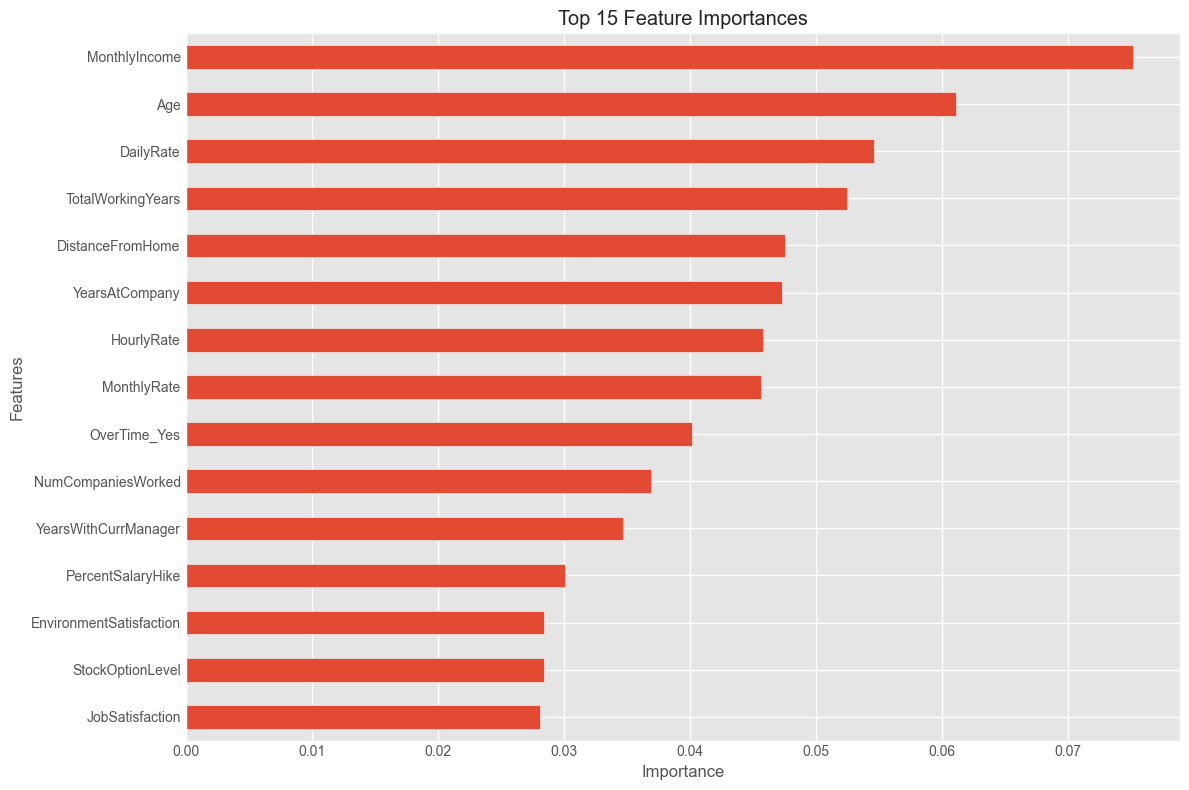

In [43]:
#feature importances from the model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

#Sorting them in descending order and show the top 15
top_15_features = feature_importances.nlargest(15)

print("Top 15 most important features:")
print(top_15_features)
plt.figure(figsize=(12, 8))
top_15_features.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


These 15 feature are influencing more to employees Attrition

<Axes: >

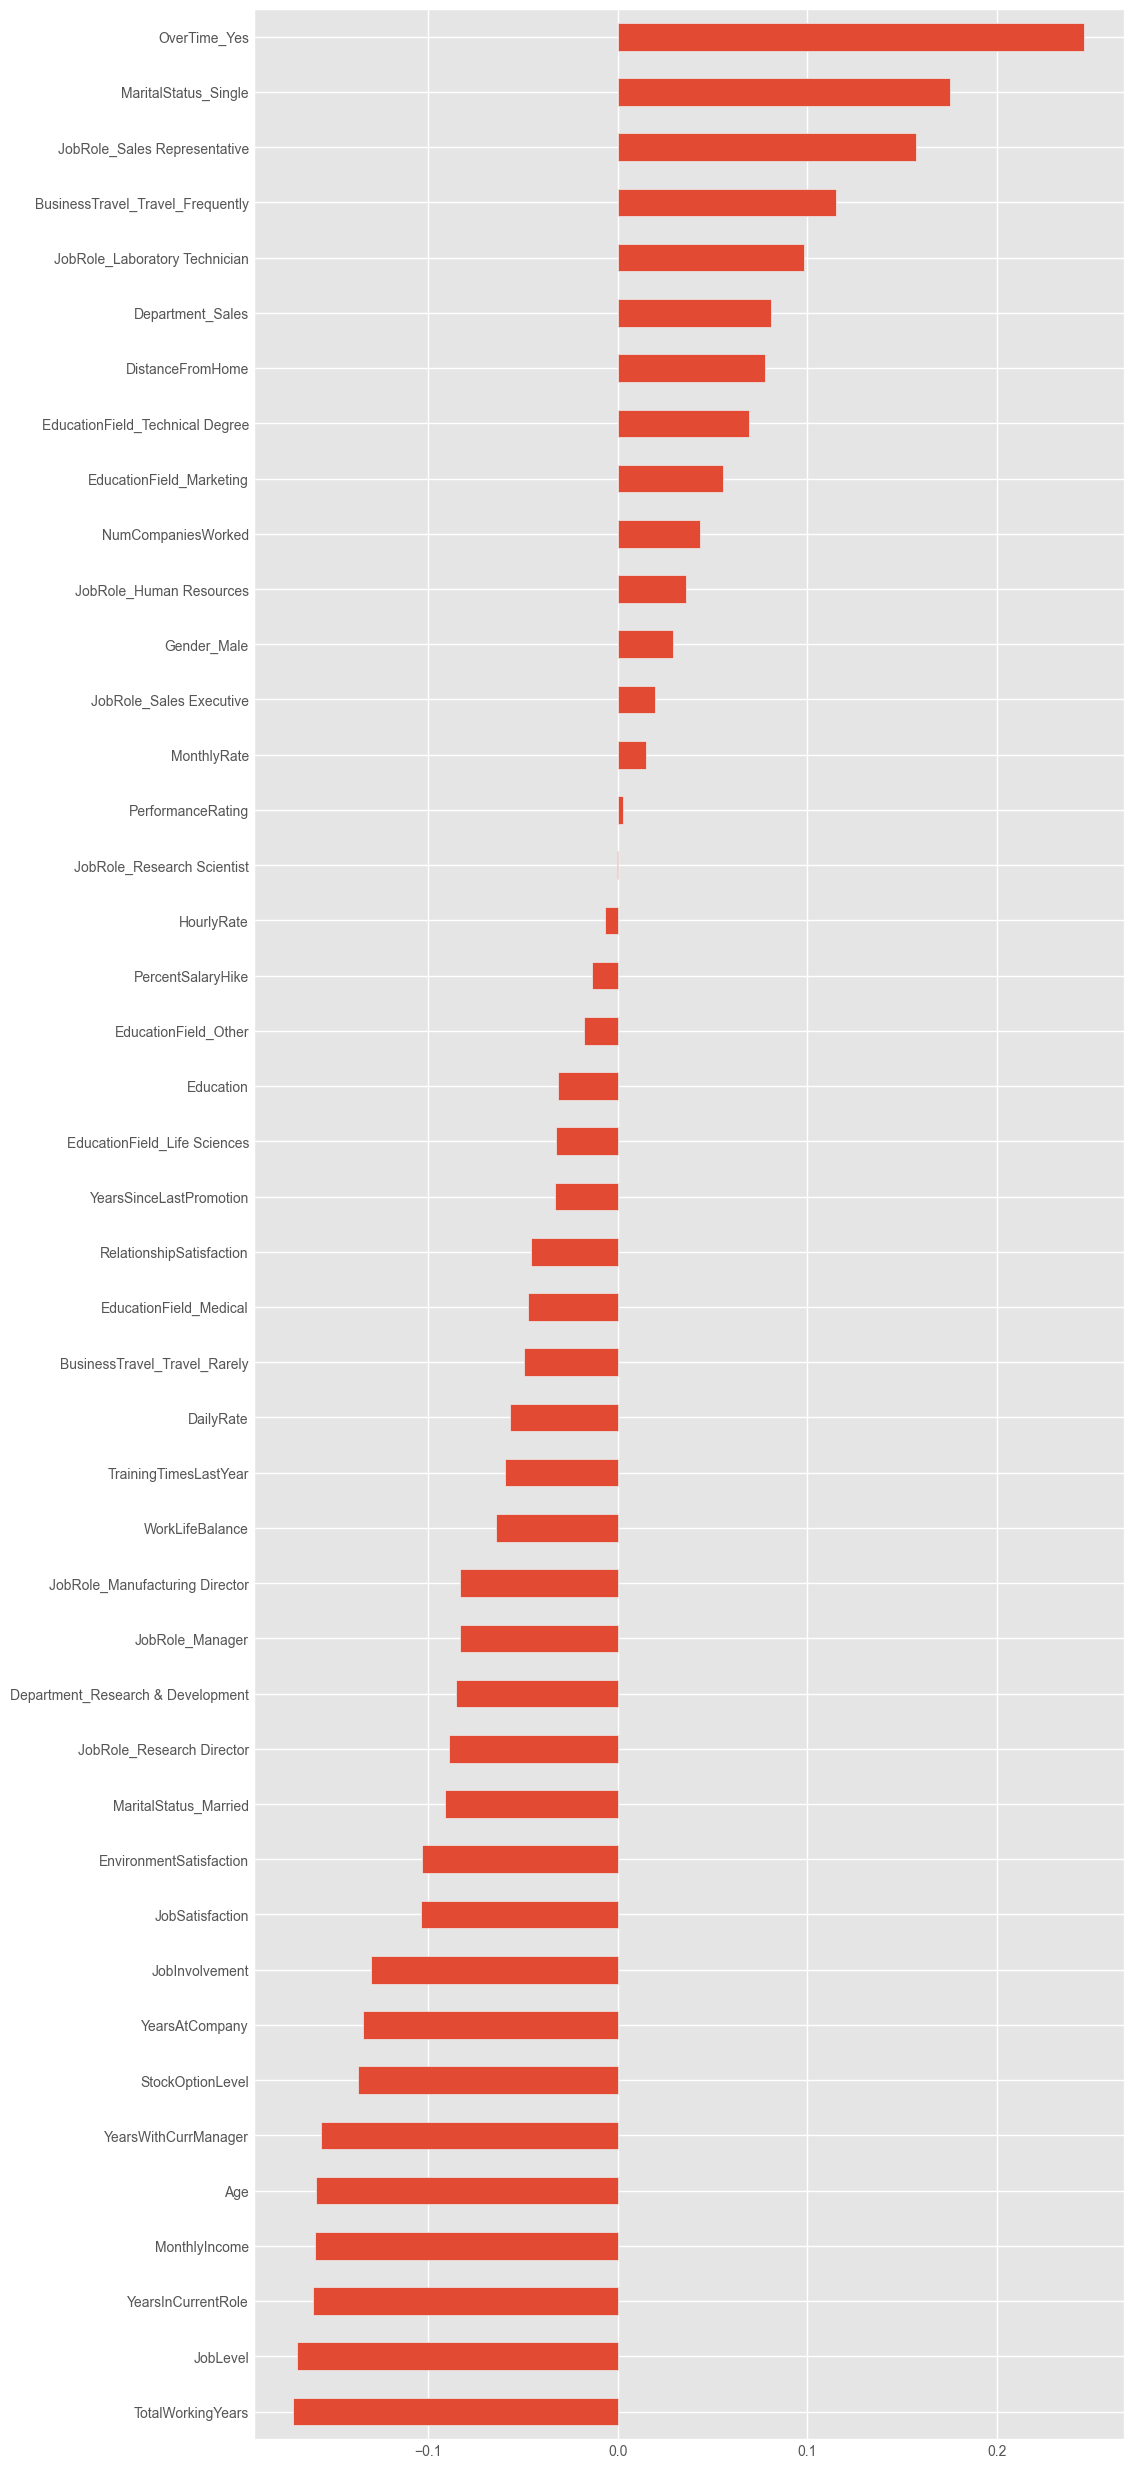

In [44]:
df_encoded.drop('Attrition', axis=1).corrwith(df_encoded.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))


# -> Prescriptive Analysis ( Actionable Recommendations )
 Based on the insights from the diagnostic analysis, here are targeted recommendations to improve employee retention:

**-> Targeted Compensation & Benefits**
The analysis showed that employees with lower monthly incomes have a higher attrition rate. To address this, the company should:

- **Review Salary Scales:** Conduct a thorough review of the salary scales, especially for employees in lower income brackets. Ensure that compensation is competitive with industry standards.

- **Introduce Performance-Based Bonuses:**  To reward and motivate employees, particularly those who are undercompensated.


**-> Work-Life Balance & Wellness**
The Analysis revealed a strong correlation between working overtime and a higher likelihood of attrition. The company should take the following steps to improve work-life balance:

- **Enforce Overtime Policies:**  Managers should be trained to monitor workloads and prevent burnout.

- **Promote Flexible Work Arrangements:** Offer flexible work hours or remote work options where feasible. This can help employees better manage their personal and professional lives.

- **Invest in Employee Wellness Programs:** Launch or enhance wellness initiatives, such as mental health support, fitness challenges, or stress-management workshops.

**-> Department-Specific Interventions**
The Sales and Human Resources departments have higher attrition rates than Research & Development. The company should:

- **Sales Department:**

**Review Sales Quotas:** Assess whether sales quotas are realistic and achievable. Unrealistic targets can lead to burnout and high turnover.

**Provide Skill Development:** Offer targeted training and professional development opportunities to help the sales team succeed.

**Enhance Recognition Programs:** Implement a more robust recognition system to celebrate sales achievements, as this can boost morale and job satisfaction.

- **Human Resources Department:**

**Increase Support and Resources:** Ensure the HR team has adequate resources and support to manage their workload effectively.

**Foster Career Growth:** Provide clear career progression paths and opportunities for professional growth within the department.

**-> Employee Tenure and Experience**
The data showed that employees with fewer years of experience are more likely to leave. To retain early-career talent, the company should:

- **Enhance Onboarding and Mentorship:** Strengthen the onboarding process to ensure new employees feel supported and integrated into the company culture.

- **Implement a Mentorship Program:** Pair junior employees with experienced mentors who can provide guidance and support, improving engagement and long-term retention.

- **Conduct Stay Interviews:** Conduct "stay interviews" with high-potential employees to understand their needs and address any concerns before they decide to leave.

#### ->  Function to evaluate Train/ Test data with different ML algos

In [45]:
from sklearn.metrics import roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# -> Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[906  18]
 [ 94  84]]
ACCURACY SCORE:
0.8984
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.82      0.90       0.86          0.89
recall      0.98   0.47      0.90       0.73          0.90
f1-score    0.94   0.60      0.90       0.77          0.89
support   924.00 178.00      0.90    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[299  10]
 [ 36  23]]
ACCURACY SCORE:
0.8750
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.70      0.88       0.79          0.86
recall      0.97  0.39      0.88       0.68          0.88
f1-score    0.93  0.50      0.88       0.71          0.86
support   309.00 59.00      0.88     368.00        368.00


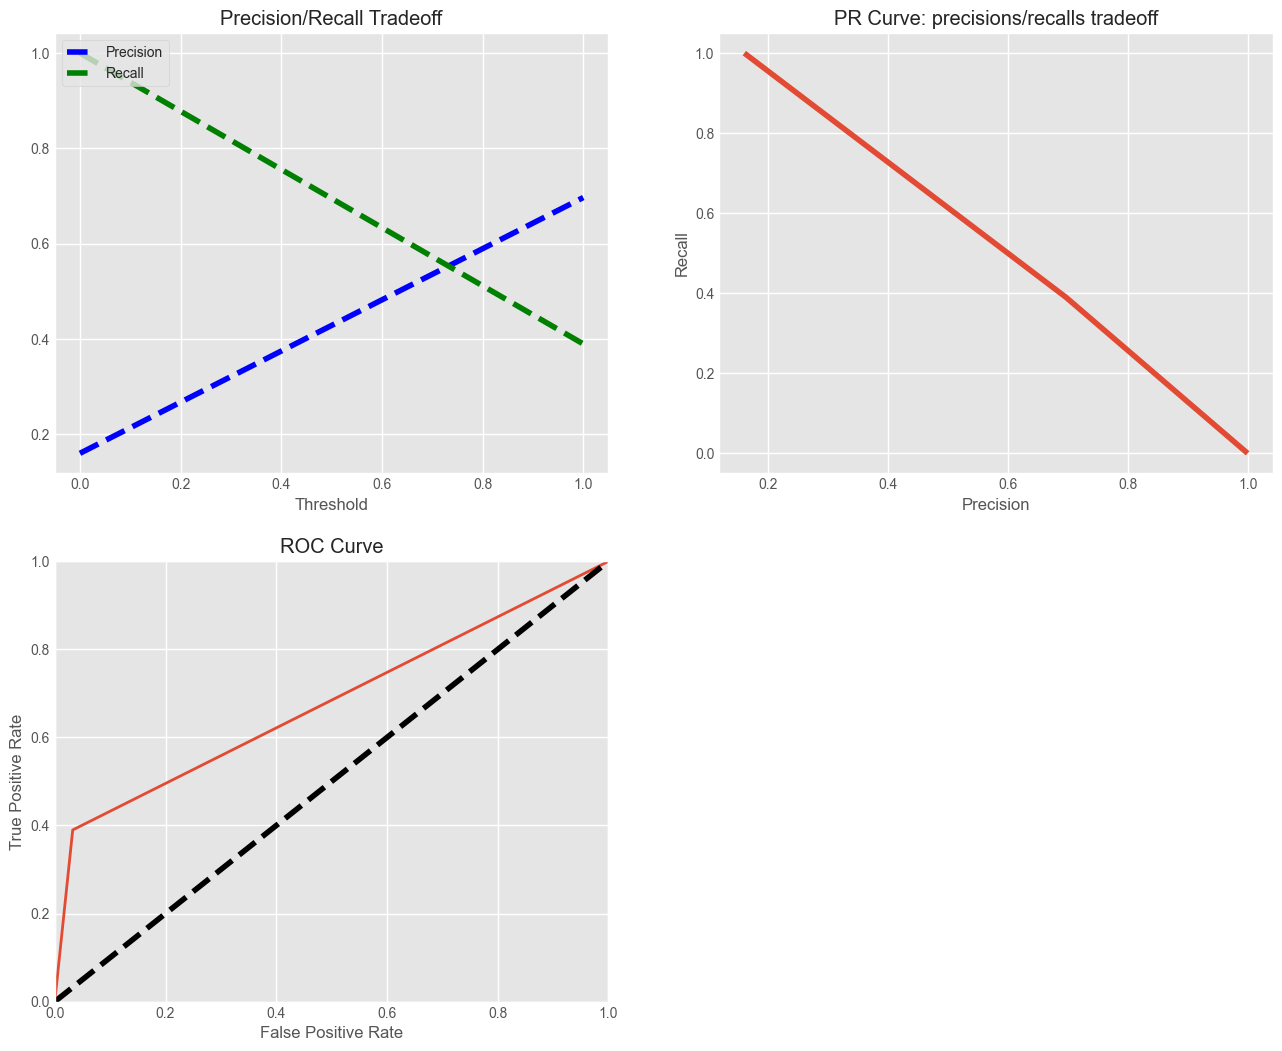

In [47]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)


In [48]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

# ->  Random Forest

In [49]:

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[924   0]
 [  0 178]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   924.00 178.00      1.00    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[301   8]
 [ 51   8]]
ACCURACY SCORE:
0.8397
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.50      0.84       0.68          0.80
recall      0.97  0.14      0.84       0.55          0.84
f1-score    0.91  0.21      0.84       0.56          0.80
support   309.00 59.00      0.84     368.00        368.00


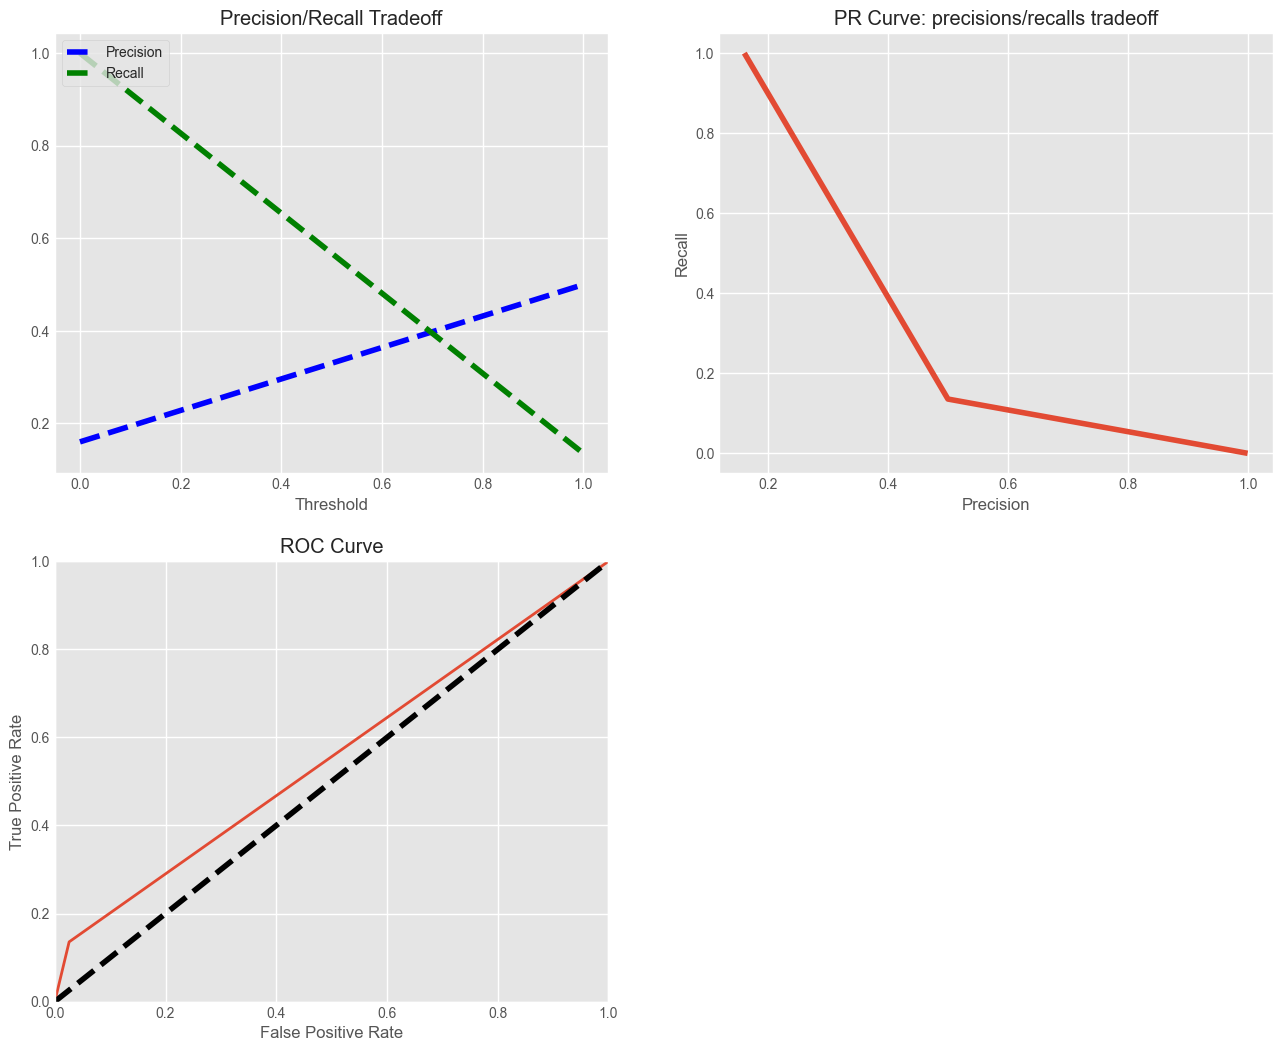

In [50]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [51]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

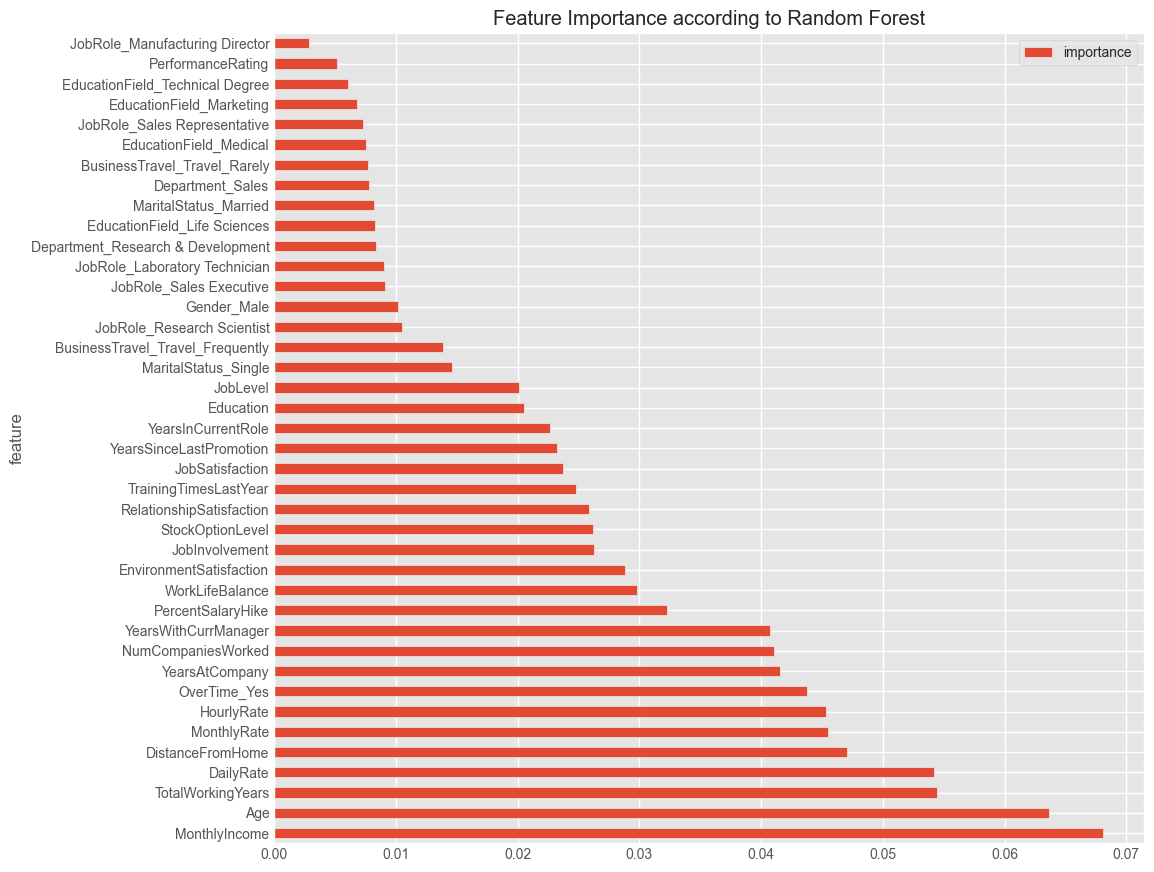

In [52]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# -> Support Vector Machine (svm)

In [53]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[905  19]
 [ 91  87]]
ACCURACY SCORE:
0.9002
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.82      0.90       0.86          0.89
recall      0.98   0.49      0.90       0.73          0.90
f1-score    0.94   0.61      0.90       0.78          0.89
support   924.00 178.00      0.90    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[298  11]
 [ 36  23]]
ACCURACY SCORE:
0.8723
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.68      0.87       0.78          0.86
recall      0.96  0.39      0.87       0.68          0.87
f1-score    0.93  0.49      0.87       0.71          0.86
support   309.00 59.00      0.87     368.00        368.00


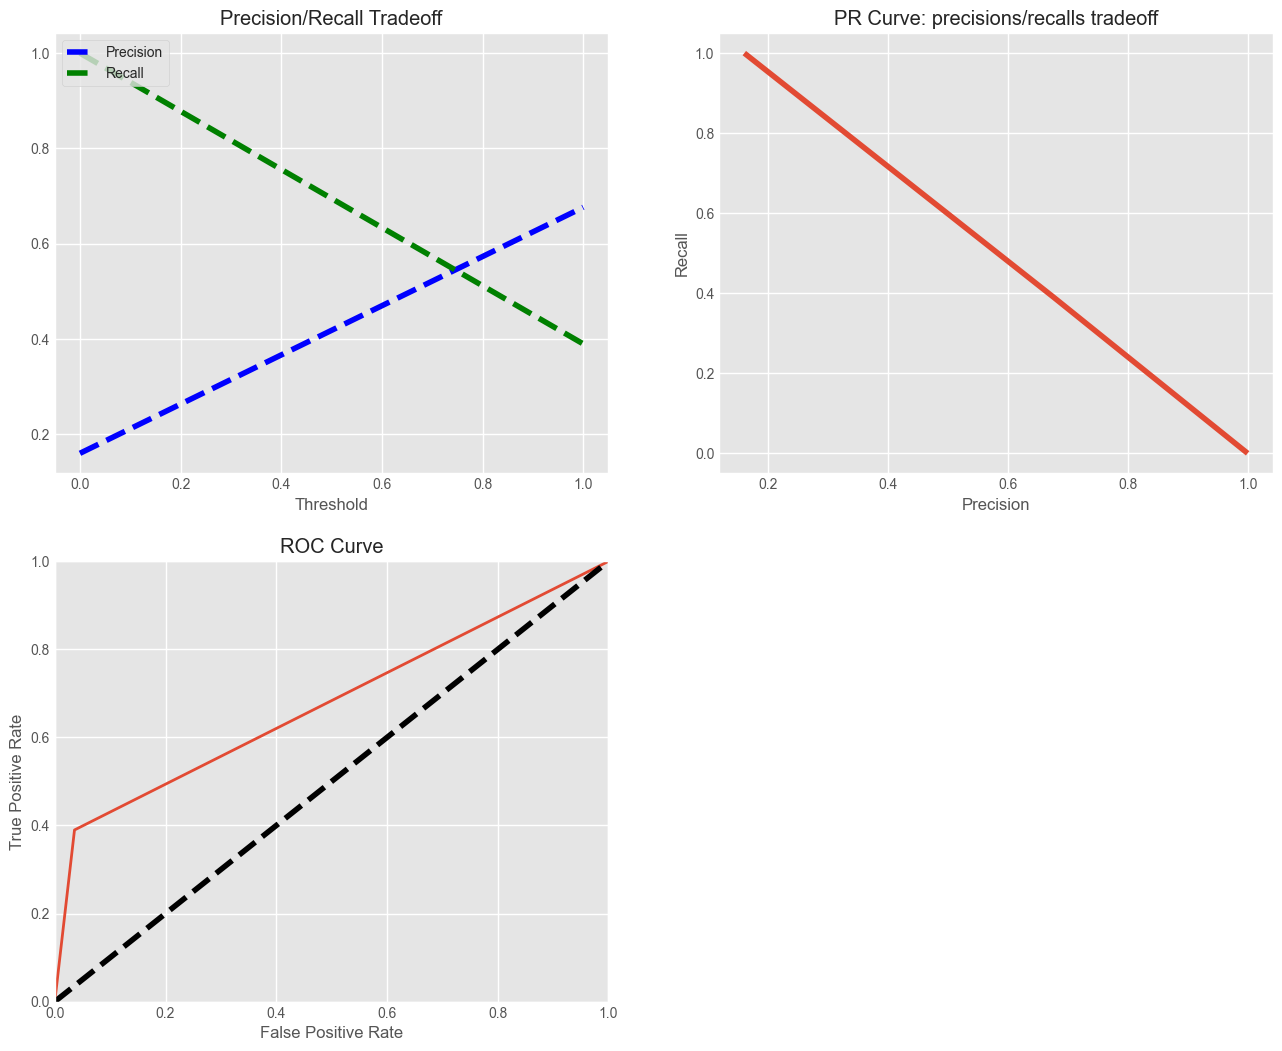

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

# -> Comparing Models Prerformance

In [55]:
ml_models = {
    'Random Forest': rf_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.555
LOGISTIC REGRESSION            roc_auc_score: 0.479
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


<Axes: >

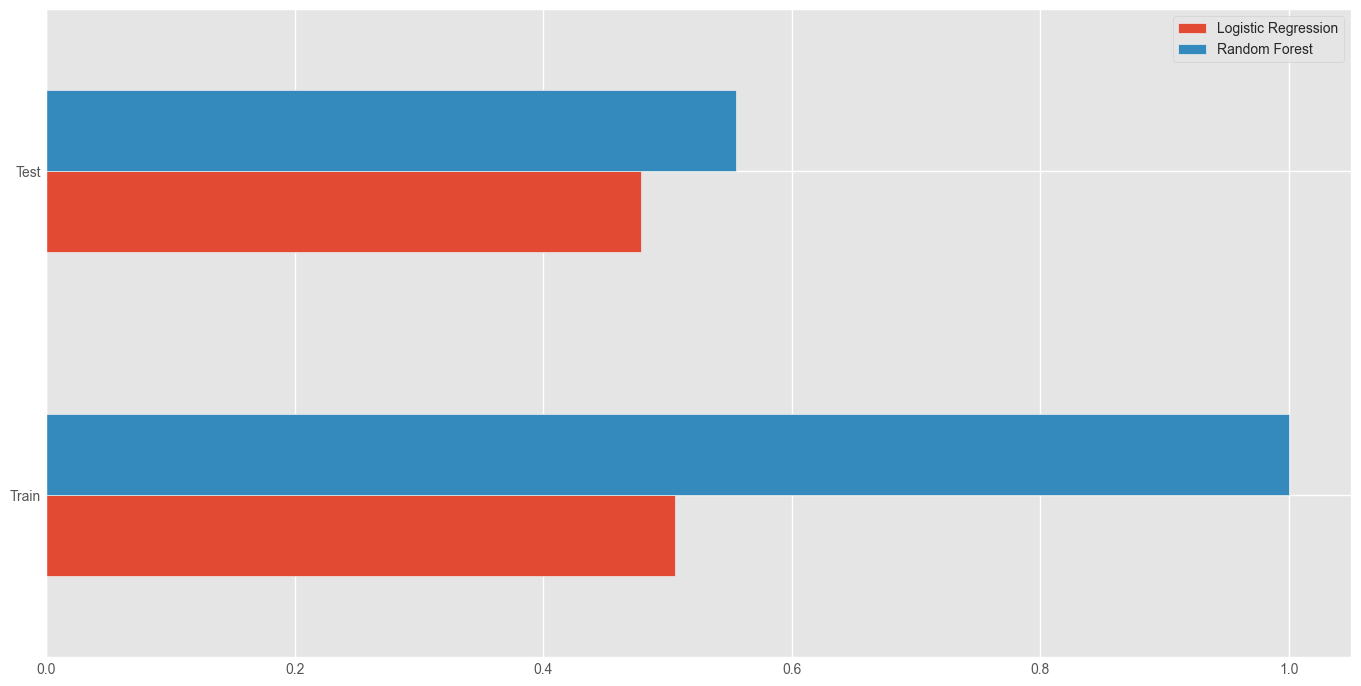

In [56]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))
#scores_df.hvplot.barh()